In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### 初期設定（パラメータ、物性値等）

In [24]:
C = 0.05
h, e, v = 6.626, 1.602, 2.998
L = (h*v/e)**2*10**4/C
B = (np.pi*C)**0.5
K = 2.296
H = 30#半値幅
E = 0.09 # ev
sigma = (h*v)/(E*e) * 0.1 # nm
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['axes.linewidth'] = 1.0

In [25]:
np.log(2)

0.6931471805599453

##### ファイル読込、計算、出力

In [26]:
def hatada(file_name, out_file_name):
    with open(file_name) as f:
        rows = [list(map(float, row.split())) for row in f]
    cal = lambda y: sum([v2/B*np.exp(-(1/y-1/v1)**2*L) for v1, v2 in rows])
    out = pd.DataFrame([[x/10, cal(x/10)] for x in range(2000, 6001)])
    out.to_csv(out_file_name, index=None, header=None)

In [31]:
def kyusyu_hatada(file_name, out_file_name):
    with open(file_name) as f:
        rows = [list(map(float, row.split())) for row in f]
    cal = lambda y: sum([abs(v2)/B*np.exp(-(1/y-1/v1)**2*L) for v1, v2 in rows])
    out = pd.DataFrame([[x/10, cal(x/10)] for x in range(2000, 6001)])
    out.to_csv(out_file_name, index=None, header=None)

In [32]:
def nakayama1(file_name, out_file_name):
    with open(file_name) as f:
        rows = [list(map(float, row.split())) for row in f]
    cal = lambda y: sum([v2*np.exp(-((y-v1)/sigma)**2/2) for v1, v2 in rows])
    out = pd.DataFrame([[x/10, cal(x/10)] for x in range(2000, 6001)])
    out.to_csv(out_file_name, index=None, header=None)

In [33]:
def nakayamaPlus(file_name, out_file_name):
    with open(file_name) as f:
        rows = [list(map(float, row.split())) for row in f]
    cal = lambda y: sum([v2*np.exp(-((y-v1)/sigma)**2/2) for v1, v2 in rows if v2 > 0])
    out = pd.DataFrame([[x/10, cal(x/10)] for x in range(2000, 6001)])
    out.to_csv(out_file_name, index=None, header=None)

In [34]:
def nakayamaMinus(file_name, out_file_name):
    with open(file_name) as f:
        rows = [list(map(float, row.split())) for row in f]
    cal = lambda y: sum([v2*np.exp(-((y-v1)/sigma)**2/2) for v1, v2 in rows if v2 < 0])
    out = pd.DataFrame([[x/10, cal(x/10)] for x in range(2000, 6001)])
    out.to_csv(out_file_name, index=None, header=None)

In [35]:
def nakayama2(file_name, out_file_name):
    with open(file_name) as f:
        rows = [list(map(float, row.split())) for row in f]
    G = lambda y,a: np.exp(-np.log(2)*(a-y)**2/H**2)
    Lo = lambda y,a : (1+(a-y)**2/H**2)**-1
    cal = lambda y: sum([a/(K*1.5*H)*b*G(y,a)*Lo(y,a) for a, b in rows])
    out = pd.DataFrame([[x/10, cal(x/10)] for x in range(2000, 6001)])
    out.to_csv(out_file_name, index=None, header=None)

###### 描画

In [36]:
def drew(input_file, png_name):
    out = pd.read_csv(input_file,header=None)
    plt.plot(out[0].values, out[1].values, color=(0,176/255,240/255))
    plt.xlabel('Wavelength / nm')
    # plt.ylabel('Mean Residue Rotation ( deg cm² / d mol )')
    plt.ylabel('Rotatory Strength / $10^{-40}$ cgs')
    plt.xlim(200, 600)
    plt.ylim(-3000, 3000)
    plt.locator_params(nbins=6)
    plt.savefig(png_name, transparent=True, dpi=300)
    plt.show()

In [59]:
def drew2(input_file, png_name):
    out = pd.read_csv(input_file,header=None)
    plt.plot(out[0].values, out[1].values, color=(0,176/255,240/255))
    plt.xlabel('Wavelength / nm')
    # plt.ylabel('Mean Residue Rotation ( deg cm² / d mol )')
    plt.ylabel('Rotatory Strength / $10^{-40}$ cgs')
    plt.xlim(200, 600)
    plt.ylim(-15000, 15000)
    plt.locator_params(nbins=6)
    plt.savefig(png_name, transparent=True, dpi=300)
    plt.show()

In [49]:
in_file = 'CD_test.in'
# test_file = 'CD_H.in'
# test_file = 'CD_I.in'
# test_file = 'CD_N.in'
out1 = 'CD_test_out1.csv'
out2 = 'CD_test_out2.csv'
out3 = 'CD_test_out3.csv'
out4 = 'CD_test_out4.csv'
out5 = 'CD_test_out5.csv'
png1 = 'hatada.png'
png2 = 'original.png'
png3 = 'nakayama.png'
png4 = 'nakayamaPlus.png'
png5 = 'nakayamaMinus.png'


In [60]:
def cd_out(name):
    test_file = 'CD_' + name + '.in'
    out = name + 'cd_by_H.csv'
    png = name + 'cd_by_H.png'
    hatada(test_file, out)
    drew(out, png)

In [61]:
def ab_out(name):
    test_file = 'CD_' + name + '.in'
    out = name + 'ab_by_H.csv'
    png = name + 'ab_by_H.png'
    kyusyu_hatada(test_file, out)
    drew2(out, png)

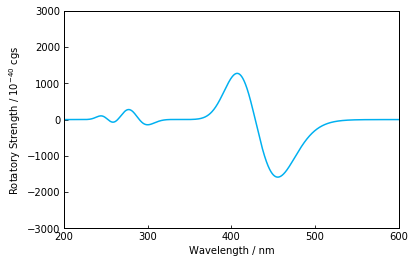

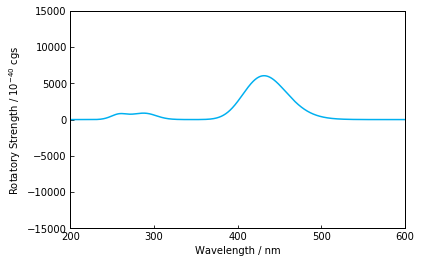

In [62]:
name = 'R1'
cd_out(name)
ab_out(name)

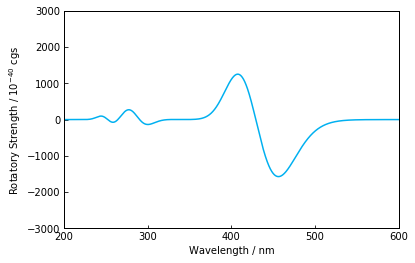

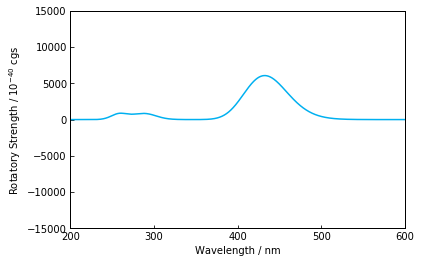

In [63]:
name = 'R2'
cd_out(name)
ab_out(name)

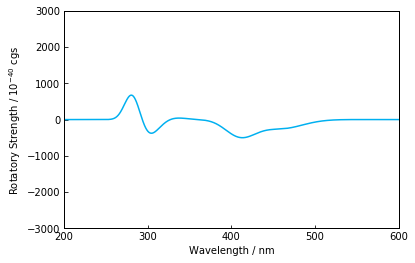

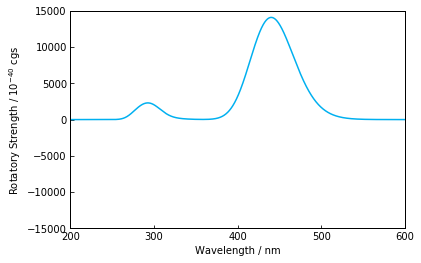

In [64]:
cd_out('H_re')
ab_out('H_re')

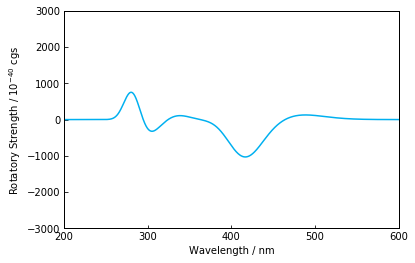

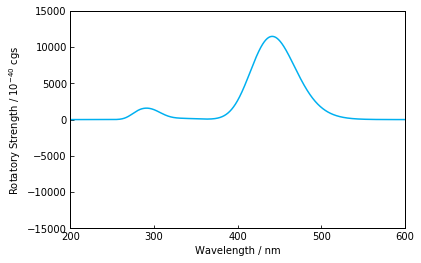

In [65]:
cd_out('I')
ab_out('I')

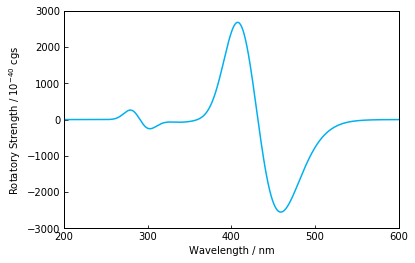

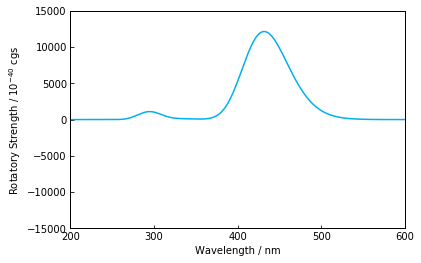

In [66]:
cd_out('N')
ab_out('N')

In [127]:
# out = 'Ncd_by_H_0.005.csv'
# png = 'Ncd_by_H_0.005.png'
# C = 0.005
# L = (h*v/e)**2*10**4/C
# B = (np.pi*C)**0.5
# hatada(test_file, out)
# drew(out, png)

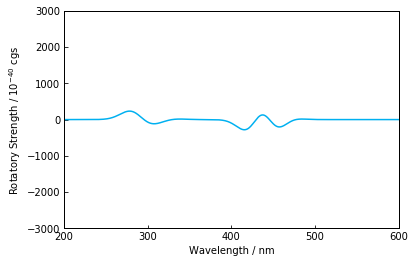

In [11]:
name = 'H_re'
test_file = 'CD_' + name + '.in'
out = name + 'cd_by_N.csv'
png = name + 'cd_by_N.png'
nakayama1(test_file, out)
drew(out, png)

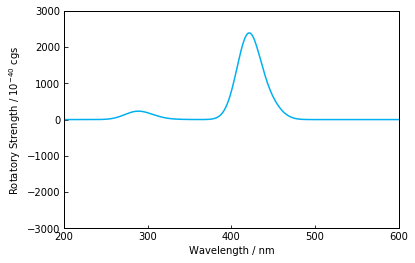

In [114]:
out = 'Hcd_by_Nplus.csv'
png = 'Hcd_by_Nplus.png'
nakayamaPlus(test_file, out)
drew(out, png)

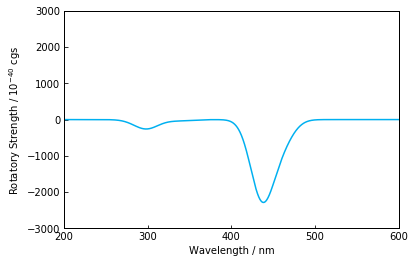

In [115]:
out = 'Hcd_by_Nminus.csv'
png = 'Hcd_by_Nminus.png'
nakayamaMinus(test_file, out)
drew(out, png)

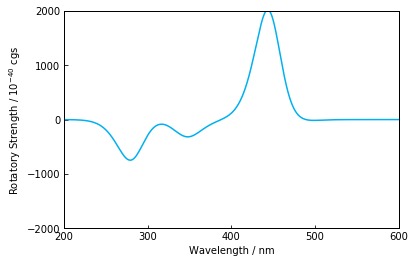

In [32]:
out = 'Hcd_by_N2.csv'
png = 'Hcd_by_N2.png'
nakayama2(test_file, out)
drew(out, png)

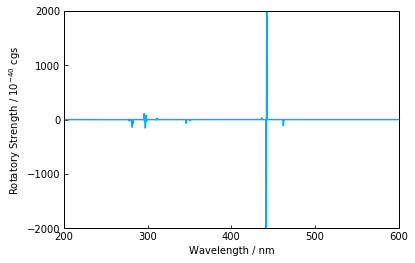

In [33]:
E = 10 # ev
sigma = (h*v)/(E*e) * 0.1 # nm
nakayama1(test_file, 'rotatory2.csv')
drew('rotatory2.csv', 'rotatory2.png')

In [467]:
out = pd.read_csv(test_file, sep='\s+',header=None)
out.to_csv('rotatory.csv', index=None, header=None)
def drew(input_file, png_name):
    out = pd.read_csv(input_file,header=None)
    plt.scatter(out[0].values, out[1].values, color=(0,176/255,240/255))
    plt.xlabel('Wavelength / nm')
    # plt.ylabel('Mean Residue Rotation ( deg cm² / d mol )')
    plt.ylabel('Rotatory Strength / $10^{-40}$ cgs')
    plt.ylim(-2000, 2000)
    plt.locator_params(nbins=6)
    plt.savefig(png_name, transparent=True, dpi=300)
    plt.show()

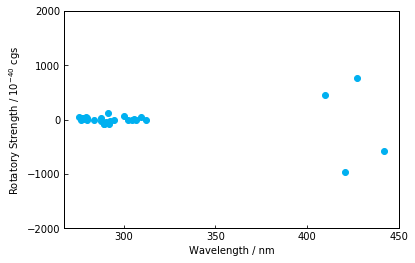

In [468]:
drew('rotatory.csv', 'rotatory.png')